In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def f(x):
    y = x**5 - 8*x**3 + 10*x + 6
    return y

In [3]:
x = np.arange(-3.0, 3.0, 0.1)

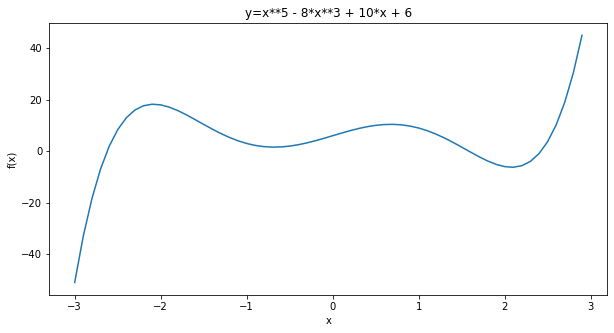

In [4]:
plt.figure(figsize=(10, 5))
fig = sns.lineplot(x=x, y=[f(xi) for xi in x])
fig.set(xlabel = 'x', ylabel='f(x)', title='y=x**5 - 8*x**3 + 10*x + 6')
plt.show()

In [5]:
# Bracketing Module

import numpy as np


def bracket_minimum(f, x, s = 1E-2, k = 2.0, verbose = False):
    
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)

    if verbose:
        print('init: (a:%.4f, b:%.4f) (ya:%.4f, yb:%.4f)' % (a, b, ya, yb))
    
    
    if yb > ya:
        a, b = b, a
        ya, yb = yb, ya
        s = -s
        
    while True:
        c, yc = b + s, f(b + s)

        if verbose:
            print('step: (a:%.4f, b:%.4f, c:%.4f) (ya:%.4f, yb:%.4f, yc:%.4f)' % (a, b, c, ya, yb, yc))

        if yc > yb:

            return (a, c) if a < c else (c, a)

        else:
            a, ya, b, yb = b, yb, c, yc
            s *= k
    

# braketing by three fold
def trifold_search(f, x, verbose = False):
    
    a, b = bracket_minimum(f, x)
    
    if verbose:
        print('init:(a:%.4f, b:%.4f)' % (a, b))
    
    distance = abs(a - b)
    
    i = 1
    while distance > 1E-6:
    
        x1 = a + (1.0 / 3.0) * distance
        x2 = a + (2.0 / 3.0) * distance
        
        y1, y2 = f(x1), f(x2)
        
        if y1 > y2:
            a, b = x1, b
        else:
            a, b = a, x2
            
    
        distance = abs(a - b)

        if verbose:
            print('%d:(a:%.4f, b:%.4f)' % (i, a, b))
        
        i += 1
    
    x = a + 0.5 * abs(a - b)
    y = f(x)
    
    return i, x, y


# Algorithm 3.2: p. 39
def fibonacci_search(f, x, n, epsilon = 1E-2, verbose = False):
    
    a, b = bracket_minimum(f, x)
    
    if verbose:
        print('init:(a:%.4f, b:%.4f)' % (a, b))
    
    psi = 0.5 * (1. + np.sqrt(5))
    s = (1. - np.sqrt(5)) / (1. + np.sqrt(5))
    
    rho = 1. / psi * ((1. - s ** (n + 1)) / (1. - s ** n))
    d = rho * b + (1. - rho) * a
    
    yd = f(d)
    
    for i in range(1, n):
        if i == n - 1:
            c = epsilon * a + (1. - epsilon) * d
            
        else:
            c = rho * a + (1. - rho) * b
        yc = f(c)
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c
    
        rho = 1. / psi * ((1. - s ** (n - i + 1)) / (1. - s ** (n - i)))

        pa, pb = (a, b) if a < b else (b, a)
        
        if verbose:
            print('%d:(a:%.4f, b:%.4f)' % (i, pa, pb))
    
    a, b = (a, b) if a < b else (b, a)
    
    x = a + 0.5 * abs(a - b)
    y = f(x)
    
    return i, x, y


# Algorithm 3.3: p.41
def golden_section_search(f, x, epsilon = 1E-6, verbose = False):

    a, b = bracket_minimum(f, x)
    
    if verbose:
        print('init:(a:%.4f, b:%.4f)' % (a, b))

    distance = abs(a - b)

    psi = 0.5 * (1. + np.sqrt(5))
    rho = psi - 1.
    d = rho * b + (1. - rho) * a
    yd = f(d)
    
    i = 1
    while distance > epsilon:
        c = rho * a + (1. - rho) * b
        yc = f(c)
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c
  
        pa, pb = (a, b) if a < b else (b, a)
        
        if verbose:
            print('%d:(a:%.4f, b:%.4f)' % (i, pa, pb))

        distance = abs(pa - pb)
        
        i += 1
        
    a, b = (a, b) if a < b else (b, a)
    
    x = a + 0.5 * abs(a - b)
    y = f(x)
    
    return i, x, y


# algorithm 3.7: p.50
def bracket_sign_change(df, a, b, k = 2.):
    
    if a > b:
        a, b = b, a
    
    center, half_width = 0.5 * (b + a), 0.5 * (b - a)
    
    while df(a) * df(b) > 0:
        
        half_width *= k
        
        a = center - half_width
        b = center + half_width

    return (a, b)
    

# algorithm 3.6: p.50
def bisection(df, init_x, epsilon = 1E-6, verbose = False):
    
    a, b = bracket_sign_change(df, init_x - epsilon, init_x + epsilon)
    
    if verbose:
        print('init:(a:%.4f, b:%.4f)' % (a, b))

    ya, yb = df(a), df(b)

    if ya == 0:
        b = a
    if yb == 0:
        a = b
    
    i = 1
    while b - a > epsilon:
        
        x = 0.5 * (a + b)
        y = df(x)
        
        if y == 0:
            a, b = x, x
        elif y * ya > 0:
            a = x
        else:
            b = x

        if verbose:
            print('step %d - a:%.4f, b:%.4f, y:%.4f, ya:%.4f' % (i, a, b, y, ya))
        
        i += 1
        
        x = a + 0.5 * abs(a - b)
        y = df(x)
    
    return i, x, y



In [6]:
#find bracket
bracket_minimum(f, 0)

(-1.27, -0.31000000000000005)

In [7]:
bracket_minimum(f, -1)

(-0.84, -0.35999999999999993)

In [8]:
bracket_minimum(f, -2)

(-1.3599999999999999, 0.5600000000000002)

In [9]:
bracket_minimum(f, -3)

OverflowError: (34, 'Result too large')

In [10]:
bracket_minimum(f, 1)

(1.6400000000000001, 3.5600000000000005)

In [11]:
bracket_minimum(f, 2)

(2.0399999999999996, 2.1599999999999997)

In [12]:
bracket_minimum(f, 3)

(0.44999999999999996, 2.37)

In [13]:
bracket_minimum(f, 4)

(-1.11, 2.73)

In [14]:
# trifold
trifold_search(f, 1, verbose=True)

init:(a:1.6400, b:3.5600)
1:(a:1.6400, b:2.9200)
2:(a:1.6400, b:2.4933)
3:(a:1.9244, b:2.4933)
4:(a:1.9244, b:2.3037)
5:(a:1.9244, b:2.1773)
6:(a:2.0087, b:2.1773)
7:(a:2.0087, b:2.1211)
8:(a:2.0462, b:2.1211)
9:(a:2.0462, b:2.0961)
10:(a:2.0628, b:2.0961)
11:(a:2.0739, b:2.0961)
12:(a:2.0739, b:2.0887)
13:(a:2.0789, b:2.0887)
14:(a:2.0789, b:2.0854)
15:(a:2.0811, b:2.0854)
16:(a:2.0811, b:2.0840)
17:(a:2.0820, b:2.0840)
18:(a:2.0827, b:2.0840)
19:(a:2.0827, b:2.0835)
20:(a:2.0827, b:2.0833)
21:(a:2.0829, b:2.0833)
22:(a:2.0829, b:2.0831)
23:(a:2.0830, b:2.0831)
24:(a:2.0830, b:2.0831)
25:(a:2.0830, b:2.0831)
26:(a:2.0830, b:2.0831)
27:(a:2.0830, b:2.0831)
28:(a:2.0830, b:2.0831)
29:(a:2.0830, b:2.0831)
30:(a:2.0830, b:2.0830)
31:(a:2.0830, b:2.0830)
32:(a:2.0830, b:2.0830)
33:(a:2.0830, b:2.0830)
34:(a:2.0830, b:2.0830)
35:(a:2.0830, b:2.0830)
36:(a:2.0830, b:2.0830)


(37, 2.083043812734811, -6.258776371634944)

In [15]:
trifold_search(f, -1, verbose=True)

init:(a:-0.8400, b:-0.3600)
1:(a:-0.8400, b:-0.5200)
2:(a:-0.7333, b:-0.5200)
3:(a:-0.7333, b:-0.5911)
4:(a:-0.7333, b:-0.6385)
5:(a:-0.7017, b:-0.6385)
6:(a:-0.7017, b:-0.6596)
7:(a:-0.6877, b:-0.6596)
8:(a:-0.6877, b:-0.6690)
9:(a:-0.6877, b:-0.6752)
10:(a:-0.6835, b:-0.6752)
11:(a:-0.6807, b:-0.6752)
12:(a:-0.6807, b:-0.6770)
13:(a:-0.6807, b:-0.6783)
14:(a:-0.6799, b:-0.6783)
15:(a:-0.6794, b:-0.6783)
16:(a:-0.6794, b:-0.6786)
17:(a:-0.6791, b:-0.6786)
18:(a:-0.6791, b:-0.6788)
19:(a:-0.6790, b:-0.6788)
20:(a:-0.6790, b:-0.6789)
21:(a:-0.6790, b:-0.6789)
22:(a:-0.6789, b:-0.6789)
23:(a:-0.6789, b:-0.6789)
24:(a:-0.6789, b:-0.6789)
25:(a:-0.6789, b:-0.6789)
26:(a:-0.6789, b:-0.6789)
27:(a:-0.6789, b:-0.6789)
28:(a:-0.6789, b:-0.6789)
29:(a:-0.6789, b:-0.6789)
30:(a:-0.6789, b:-0.6789)
31:(a:-0.6789, b:-0.6789)
32:(a:-0.6789, b:-0.6789)
33:(a:-0.6789, b:-0.6789)


(34, -0.678916665067644, 1.5700471932274827)

In [16]:
#golden section
golden_section_search(f, 1)

(32, 2.0830439537152614, -6.258776371635285)

In [17]:
golden_section_search(f, -1)

(29, -0.6789168754193231, 1.5700471932271718)

In [18]:
import sympy as sp

x = sp.Symbol('x')
df = sp.diff(f(x), x)
print(df)

5*x**4 - 24*x**2 + 10


In [20]:
derv = sp.lambdify(x, df, 'numpy')

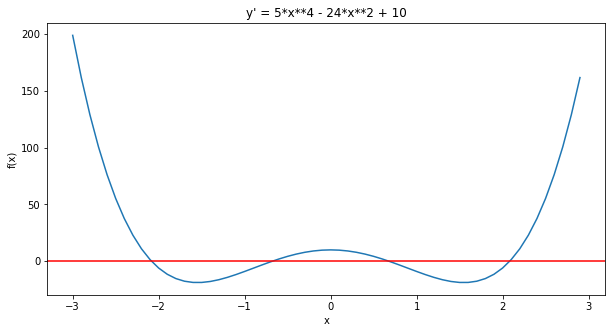

In [24]:
x = np.arange(-3.0, 3.0, 0.1)

plt.figure(figsize=(10, 5))
fig = sns.lineplot(x=x, y=[derv(xi) for xi in x])
fig.set(xlabel='x', ylabel='f(x)', title="y\' = 5*x**4 - 24*x**2 + 10")
fig.axhline(y=0, color='r')
plt.show()

In [25]:
bracket_sign_change(derv, 1 - 1e-6, 1 + 1e-6)

(0.4757120000140276, 1.5242879999859724)

In [26]:
bisection(derv, 1, verbose=True)

init:(a:0.4757, b:1.5243)
step 1 - a:0.4757, b:1.0000, y:-9.0000, ya:4.8248
step 2 - a:0.4757, b:0.7379, y:-1.5843, ya:4.8248
step 3 - a:0.6068, b:0.7379, y:1.8413, ya:4.8248
step 4 - a:0.6723, b:0.7379, y:0.1732, ya:4.8248
step 5 - a:0.6723, b:0.7051, y:-0.6958, ya:4.8248
step 6 - a:0.6723, b:0.6887, y:-0.2587, ya:4.8248
step 7 - a:0.6723, b:0.6805, y:-0.0420, ya:4.8248
step 8 - a:0.6764, b:0.6805, y:0.0658, ya:4.8248
step 9 - a:0.6785, b:0.6805, y:0.0119, ya:4.8248
step 10 - a:0.6785, b:0.6795, y:-0.0150, ya:4.8248
step 11 - a:0.6785, b:0.6790, y:-0.0016, ya:4.8248
step 12 - a:0.6787, b:0.6790, y:0.0052, ya:4.8248
step 13 - a:0.6788, b:0.6790, y:0.0018, ya:4.8248
step 14 - a:0.6789, b:0.6790, y:0.0001, ya:4.8248
step 15 - a:0.6789, b:0.6789, y:-0.0007, ya:4.8248
step 16 - a:0.6789, b:0.6789, y:-0.0003, ya:4.8248
step 17 - a:0.6789, b:0.6789, y:-0.0001, ya:4.8248
step 18 - a:0.6789, b:0.6789, y:0.0000, ya:4.8248
step 19 - a:0.6789, b:0.6789, y:-0.0000, ya:4.8248
step 20 - a:0.6789, b:

(21, 0.6789165000085907, 8.591050569606296e-06)

In [34]:
# Local Descent

# Algorithm 4.1: p.54
def line_search(f, x, d):
    
    def obj(alpha):
        
            return f(x + alpha * d)
            
    
    a, b = bracket_minimum(obj, 0.)
    
    _, alpha, _ = golden_section_search(obj, 0.)
    
    return alpha, x + alpha * d


# Algorithm 4.2: p.56
def backtracking_line_search(f, grads, x, d, alpha = 10, p = 0.5, beta = 1E-4, verbose = False):
    
    y, g = f(x), grads(x)
    
    i = 1
    while f(x + alpha * d) > y + beta * alpha * np.dot(g, d): # g.T @ d
        
        alpha *= p

        if verbose:
            print('%d: alpha = %.4f' % (i, alpha))
        
        i += 1
        
    return alpha


# Algorithm 4.3: p.62
def strong_backtracking(f, gradient, x, d, alpha = 1.0, beta = 1E-4, sigma = 1E-1, verbose = False):
    
    y0, g0, y_prev, alpha_prev = f(x), np.dot(gradient(x), d), np.nan, 0.0
    alpha_lo, alpha_hi = np.nan, np.nan

    # bracket phase
    while True:
        
        y = f(x + alpha * d)
        
        if y > y0 + beta * alpha * g0 or (not(np.isnan(y_prev)) and y >= y_prev):
            alpha_lo, alpha_hi = alpha_prev, alpha
            break
        
        g = np.dot(gradient(x + alpha * d), d)
        
        if np.abs(g) <= -sigma * g0:
            return alpha
        elif g >= 0:
            alpha_lo, alpha_hi = alpha, alpha_prev
            break
        
        y_prev, alpha_prev, alpha = y, alpha, 2 * alpha
    
    if verbose:
        print('backtracking: alpha %.4f, y %.4f' % (alpha, y))
    
      
    # zoom phase
    y_lo = f(x + alpha_lo * d)
    
    while True:

        alpha = 0.5 * (alpha_lo + alpha_hi)
        y = f(x + alpha * d)
        
        if (y > y0 + beta * alpha * g0 ) or (y >= y_lo):
            alpha_hi = alpha
        else:
            g = np.dot(gradient(x + alpha * d), d)
            
            if abs(g) <= -sigma * g0:
                return alpha
            elif g * (alpha_hi - alpha_lo) >= 0.0:
                alpha_hi = alpha_lo
            
            alpha_lo = alpha


# local descent with backtracking line search
def local_descent_backtracking(f, grads, x_, alpha = 1, TOL = 1E-8, verbose = False):

    d_ = -1 * np.array(grads(x_))
    
    alpha = backtracking_line_search(f, grads, x_, d_, alpha)
    
    if verbose:
        print(alpha, x_, f(x_))
    
    y_prev = f(x_)
    
    i = 1
    flag = True
    while flag:
    
        x_ = x_ + alpha * d_
        d_ = -1 * np.array(grads(x_))
    
        alpha = backtracking_line_search(f, grads, x_, d_, alpha)
    
        y_ = f(x_)
        
        diff = np.abs(y_ - y_prev)
        
        if verbose:
            print(i, alpha, x_, f(x_), diff)

        if diff < TOL * (abs(y_prev) + TOL):
            flag = False
   
        y_prev = y_
        
        i += 1

    return i, x_, y_


# local descent with strong backtracking
def local_descent_strong_backtracking(f, grads, x_, alpha = 1, TOL = 1E-8, verbose = False):

    d_ = -1 * np.array(grads(x_))
    
    alpha = strong_backtracking(f, grads, x_, d_, alpha)
    
    if verbose:
        print(alpha, x_, f(x_))
    
    y_prev = f(x_)
    
    i = 1
    flag = True
    while flag:
    
        x_ = x_ + alpha * d_
        d_ = -1 * np.array(grads(x_))
    
        alpha = strong_backtracking(f, grads, x_, d_, alpha)
    
        y_ = f(x_)
        
        diff = np.abs(y_ - y_prev)
        
        if verbose:
            print(i, alpha, x_, f(x_), diff)

        if diff < TOL * (abs(y_prev) + TOL):
            flag = False
    
        y_prev = y_
        i += 1
    
    return i, x_, y_


In [28]:
x = 0
d = -1
line_search(f, x, d)

(0.6789167287992224, -0.6789167287992224)

In [29]:
def f(x):
    y = x[0]**5 - 8*x[0]**3 + 10*x[0] + 6
    return y

In [30]:
x = sp.IndexedBase('x')
gradients = np.array([sp.diff(f(x), x[i]) for i in range(1)])
grads = sp.lambdify(x, gradients, 'numpy')

In [31]:
x_ = np.array([-1])
local_descent_backtracking(f, grads, x_, 1)

(22, array([-0.67888985]), 1.570047202805326)

In [32]:
x_ = np.array([-2])
local_descent_backtracking(f, grads, x_, 1)

(10, array([2.0830397]), -6.258776370918298)

In [35]:
x_ = np.array([-1])
local_descent_strong_backtracking(f, grads, x_, 1)

(5, array([-0.67891722]), 1.5700471932292022)

In [36]:
x_ = np.array([-2])
local_descent_strong_backtracking(f, grads, x_, 1)

(5, array([2.08304561]), -6.25877637151876)

In [39]:
def draw_rosenbrock(a, b, levels):
    
    rosenbrockfunction = lambda x1, x2: (a - x1)**2 + b*(x2 - x1**2)**2
    
    X1, X2 = np.meshgrid(np.linspace(-2.0, 2.0, 400), np.linspace(-2.0, 2.0, 400))
    Y = rosenbrockfunction(X1, X2)
    
    plt.figure(figsize=(8, 8))
    plt.contour(X1, X2, Y, np.logspace(-2.0, 2.0, levels, base=10))#, cmap='gray') 
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

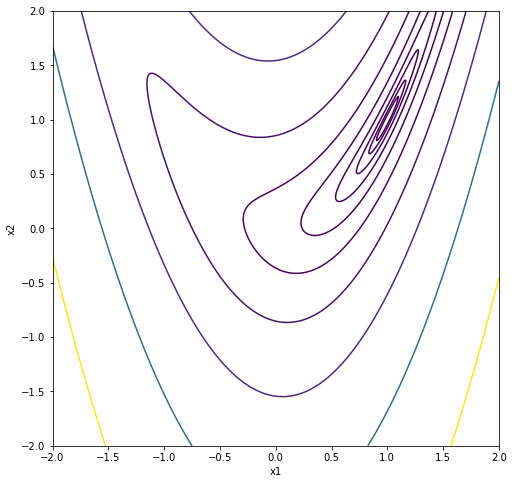

In [40]:
draw_rosenbrock(1, 5, 10)

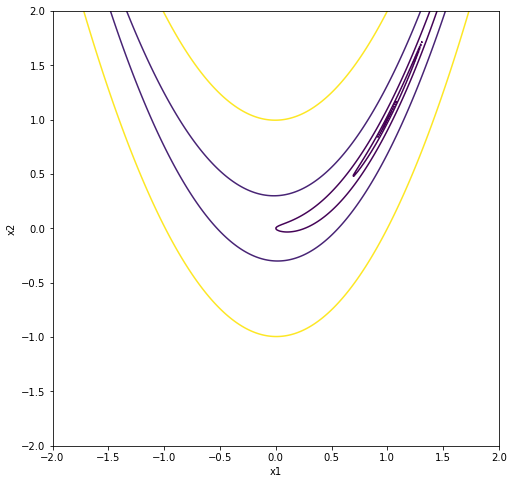

In [41]:
draw_rosenbrock(1, 100, 5)

In [42]:
# Gradient Descent

import numpy as np

# Algorithm 4.3: p.62
def strong_backtracking(f, grads, x, d, alpha = 1.0, beta = 1E-4, sigma = 1E-1, verbose = False):
    
    y0, g0, y_prev, alpha_prev = f(x), np.dot(grads(x), d), np.nan, 0.0
    alpha_lo, alpha_hi = np.nan, np.nan

    # bracket phase
    while True:
        
        y = f(x + alpha * d)
        
        if y > y0 + beta * alpha * g0 or (not(np.isnan(y_prev)) and y >= y_prev):
            alpha_lo, alpha_hi = alpha_prev, alpha
            break
        
        g = np.dot(grads(x + alpha * d), d)
        
        if np.abs(g) <= -sigma * g0:
            return alpha
        elif g >= 0:
            alpha_lo, alpha_hi = alpha, alpha_prev
            break
        
        y_prev, alpha_prev, alpha = y, alpha, 2 * alpha
        
    if verbose:
        print('backtracking: alpha %.4f, y %.4f' % (alpha, y))
    
    # zoom phase
    y_lo = f(x + alpha_lo * d)
    
    while True:

        alpha = 0.5 * (alpha_lo + alpha_hi)
        y = f(x + alpha * d)
        
        if (y > y0 + beta * alpha * g0 ) or (y >= y_lo):
            alpha_hi = alpha
        else:
            g = np.dot(grads(x + alpha * d), d)
            
            #print(abs(g), -sigma * g0)
            
            if abs(g) <= -sigma * g0:
                return alpha
            elif g * (alpha_hi - alpha_lo) >= 0.0:
                alpha_hi = alpha_lo
            
            alpha_lo = alpha

            
def GradientDescent(f, grads, x, alpha, maxiter = 1000, TOL = 1E-4, verbose = False):
    
    y_prev = f(x)
    
    flag = True
    i = 1
    
    while flag:
        
        g = np.asarray(grads(x))
        g = g / np.sqrt(np.dot(g, g))
        
        x = x + alpha * (-1 * g)
        
        y = f(x)

        if verbose:
            print('{}: y {:.4f}, x {}'.format(i, y, x))
        
        if abs(y_prev - y) < TOL * (abs(y_prev) + TOL) or i >= maxiter:
            
            flag = False
        
        y_prev = y
        
        i += 1
        
    return i, y, x
        
    

def ConjugateGradient(f, grads, x, method = 'FL', maxiter = 1000, TOL = 1E-4, verbose = False):
    
    y_prev = f(x)
    g_prev = np.asarray(grads(x))
    d = -1 * g_prev
    
    alpha =  strong_backtracking(f, grads, x, d, 1)
    x = x + alpha * d
    
    i = 1
    flag = True
    while flag:
        
        g = np.asarray(grads(x))
        
        if method == 'FL':
            beta = (np.dot(g, g)) / (np.dot(g_prev, g_prev)) # Fletcher_Reeves
        elif method == 'PR':
            beta = (np.dot(g, (g - g_prev))) / (np.dot(g_prev, g_prev)) # Polak-Ribiere
            beta = np.max(beta, 0)
        else:
            beta = (np.dot(g, g)) / (np.dot(g_prev, g_prev)) # Fletcher_Reeves
            
        d = - g + beta * d
        
        alpha =  strong_backtracking(f, grads, x, d, 1)

        x = x + alpha * d
        y = f(x)

        if verbose:
             print('{}: y {:.4f}, x {}'.format(i, y, x))
        
        if np.abs(y - y_prev) < TOL * (np.abs(y_prev) + TOL) or i >= maxiter:
            
            flag = False
        
        y_prev = y
        g_prev = g
        
        i += 1
        
    return i, y, x



In [43]:
# Rosenbrock
def f(x, a=1, b=5):
    y = (a-x[0])**2 + b*(x[1] - x[0]**2)**2
    return y

In [45]:
x = sp.IndexedBase('x')
gradients = np.array([sp.diff(f(x), x[i]) for i in range(2)])
grads = sp.lambdify(x, gradients, 'numpy')

In [46]:
x_ = np.array([-2, 2])
alpha = 1e-2

In [47]:
GradientDescent(f, grads, x_, alpha)

(1001, 0.0007551777863281896, array([1.00438216, 0.99665114]))

In [48]:
ConjugateGradient(f, grads, x_)

(14, 2.891339444529014e-09, array([0.99994733, 0.99988982]))